### Ever wondered how e-commerce companies go through all their customer reviews to improve customer service? Well here is how it's done. 
### Sentiment Analysis of the data is done using Natural Language Processing and ML Supervised Learning methods are used to predict the sentiment of reviews. Ok! let's get started.
### In this notebook, I will be using data of twitter customer reviews for various Airlines in USA.

In [131]:
#Import all the required libraries
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package stopwords to /home/mis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
#Importing the input data file
tweet = pd.read_csv('/home/mis/Downloads/Extra/sentiment_analysis/Tweets.csv')

In [94]:
# Printing the head of the data
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [95]:
#Finding various Airlines in the dataset.
tweet.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

We can see that 6 different airlines are available in the dataset.

In [132]:
#Finding the number of rows and columns in the dataset.
tweet.shape

(14640, 18)

In [65]:
#counting the number of tweets each airlines has received 
tweet.airline.value_counts().reset_index()

,index,airline
0,United,3822
1,US Airways,2913
2,American,2759
3,Southwest,2420
4,Delta,2222
5,Virgin America,504


Text(0,0.5,'No. of Tweets')

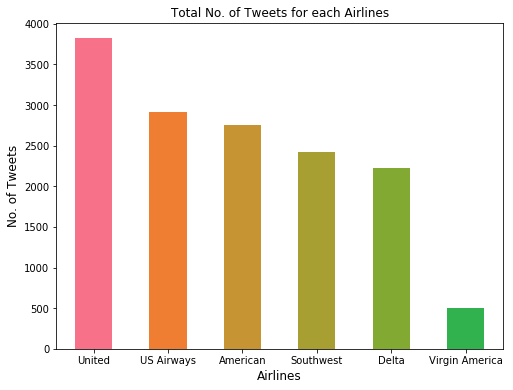

In [66]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("husl", 14) 
pd.Series(tweet["airline"]).value_counts().plot(kind = "bar",color=colors,figsize=(8,6),fontsize=10,rot = 0, 
                                                title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=12)
plt.ylabel('No. of Tweets', fontsize=12)

From above graph we can see that United Airlines has received maximum number of tweets and Virgin America Airlines has received minimum number of tweets.

In [67]:
#counting the number of each type of sentiments 
tweet.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0,0.5,'No. of Tweets')

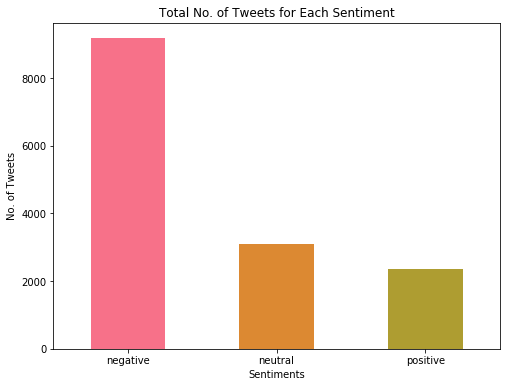

In [68]:
#Plotting the number of each type of sentiments 
colors=sns.color_palette("husl", 10)
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

From the above graph we can see that there are high amount of negative tweets in the dataset.

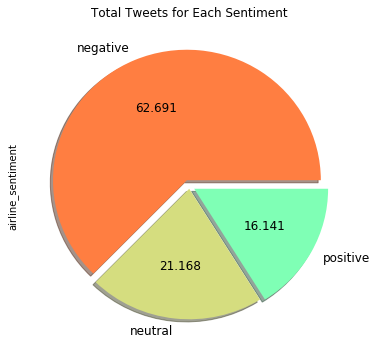

In [133]:
#Plotting the percentage of each type of sentiments 

colors=sns.color_palette("rainbow_r", 5)
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.3f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

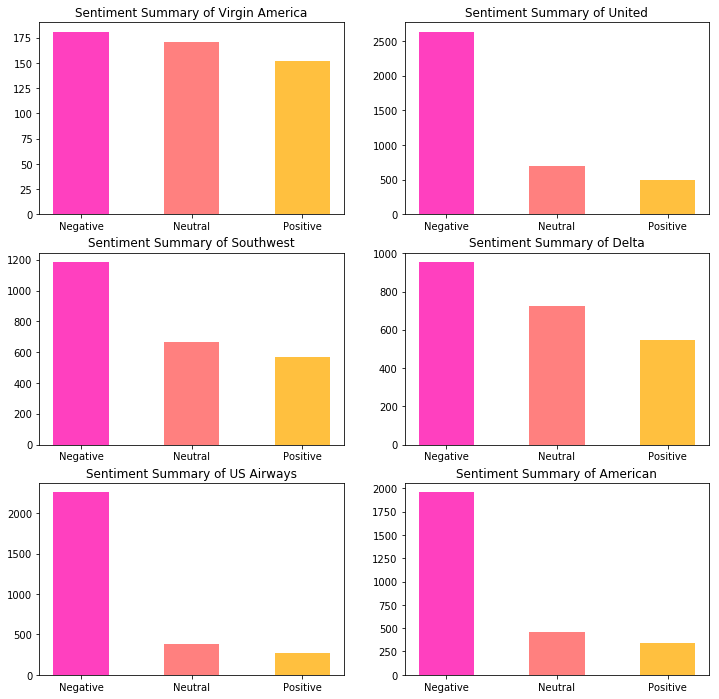

In [70]:
#Plotting number of each type of sentiments for each airline
def plot_sub_sentiment(Airline):
    pdf = tweet[tweet['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("spring", 3)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = tweet['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [71]:
#counting the total number of negative reasons
tweet.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0,0.5,'No. of Tweets')

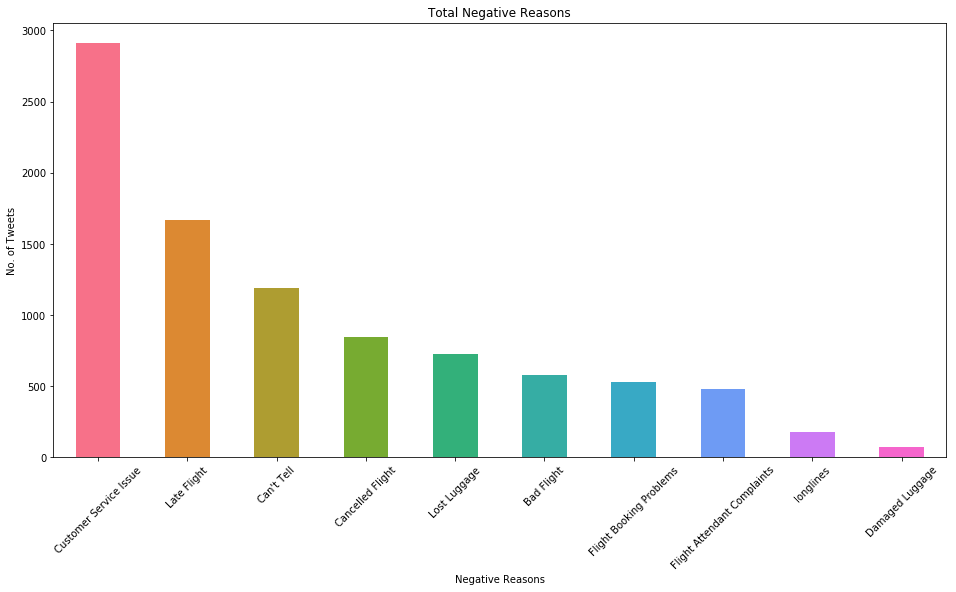

In [72]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(tweet["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(16,8),title = "Total Negative Reasons",rot=45)
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

From above graph it is clear that Customer Service Issues are the main reason for all the negative reviews.

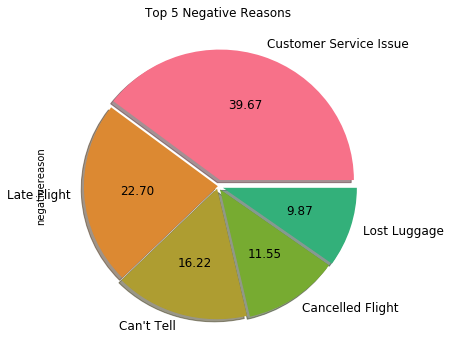

In [73]:
#Plotting the percentage of all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(tweet["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

In [74]:
#Airline vs Reviews
air_senti=pd.crosstab(tweet.airline, tweet.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


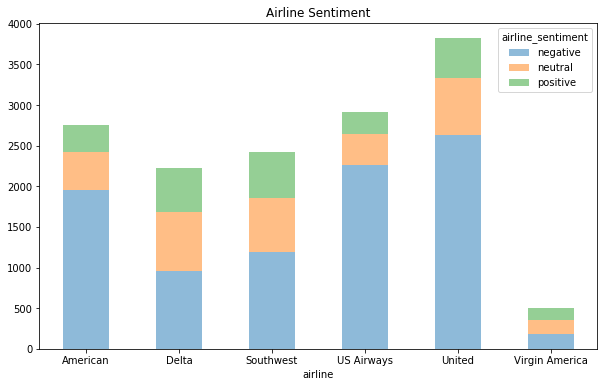

In [75]:
pd.crosstab(index = tweet["airline"],columns = tweet["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

In [136]:
tweet['tweet_created'] = pd.to_datetime(tweet['tweet_created'])
tweet["date_created"] = tweet["tweet_created"].dt.date
tweet["date_created"].head()

0    2015-02-24
1    2015-02-24
2    2015-02-24
3    2015-02-24
4    2015-02-24
Name: date_created, dtype: object

In [78]:
df = tweet.groupby(['date_created','airline'])
df = df.airline_sentiment.value_counts()
df.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-16   Delta                1.0      1.0       NaN
             United               2.0      NaN       NaN
2015-02-17   Delta              108.0     86.0      69.0
             Southwest          213.0     85.0      86.0
             US Airways         233.0     30.0      48.0
             United             272.0     75.0      49.0
             Virgin America      12.0     21.0      21.0
2015-02-18   American             1.0      NaN       NaN
             Delta              105.0     86.0      77.0
             Southwest          110.0    106.0      76.0
             US Airways         244.0     32.0      41.0
             United             257.0     90.0      59.0
             Virgin America      19.0     21.0      20.0
2015-02-19   American             NaN      NaN       1.0
             Delta              135.0     70.0      78.0
             Southwest          127.0     94.0      96.0
             US Airways         193.0     54.0      32.0
             United             272.0     85.0      69.0
             Virgin America      24.0     26.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta               91.0     90.0      70.0
             Southwest          132.0    110.0      77.0
             US Airways         248.0     52.0      33.0
             United             342.0     99.0      85.0
             Virgin America      21.0     32.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               98.0     79.0      66.0
             Southwest          257.0     60.0      53.0
             US Airways         291.0     39.0      30.0
             United             365.0     88.0      53.0
             Virgin America      37.0     12.0      28.0
2015-02-22   American           762.0    132.0      94.0
             Delta              255.0     76.0      77.0
             Southwest          129.0     77.0      73.0
             US Airways         561.0     60.0      27.0
             United             532.0    102.0      69.0
             Virgin America      27.0     16.0      10.0
2015-02-23   American           826.0    178.0     137.0
             Delta              125.0    195.0      71.0
             Southwest          116.0     83.0      77.0
             US Airways         372.0     74.0      42.0
             United             449.0    109.0      83.0
             Virgin America      31.0     37.0      23.0
2015-02-24   American           369.0    153.0     104.0
             Delta               37.0     40.0      36.0
             Southwest          102.0     49.0      32.0
             US Airways         121.0     40.0      16.0
             United             142.0     49.0      25.0
             Virgin America      10.0      6.0      13.0

#### WordCloud is one of the best way of plotting the most common words in a dataset. It looks so cool!

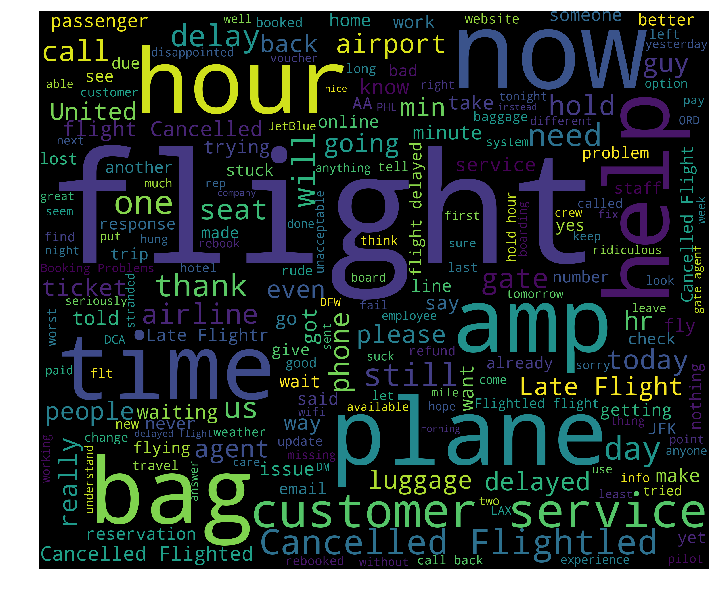

In [80]:
#visualization using wordcloud for the negative tweets
df=tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])


wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

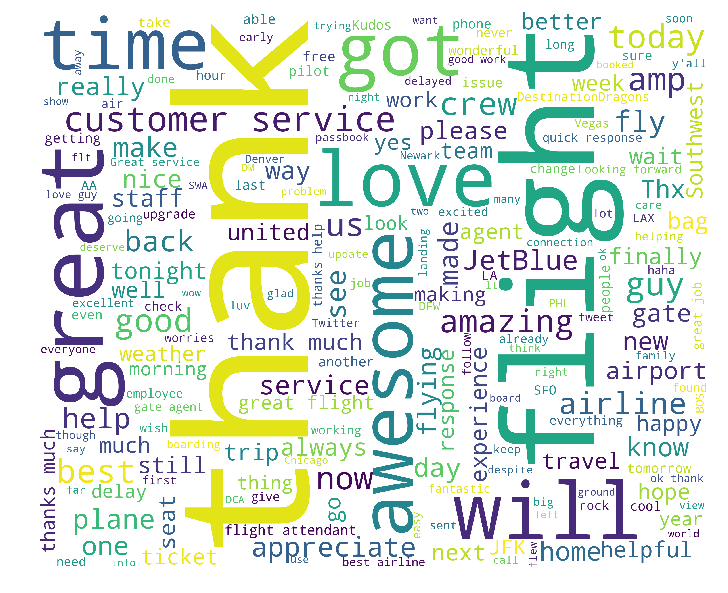

In [81]:
#visualization using wordcloud for the positive tweets
df=tweet[tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])


wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=2500).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

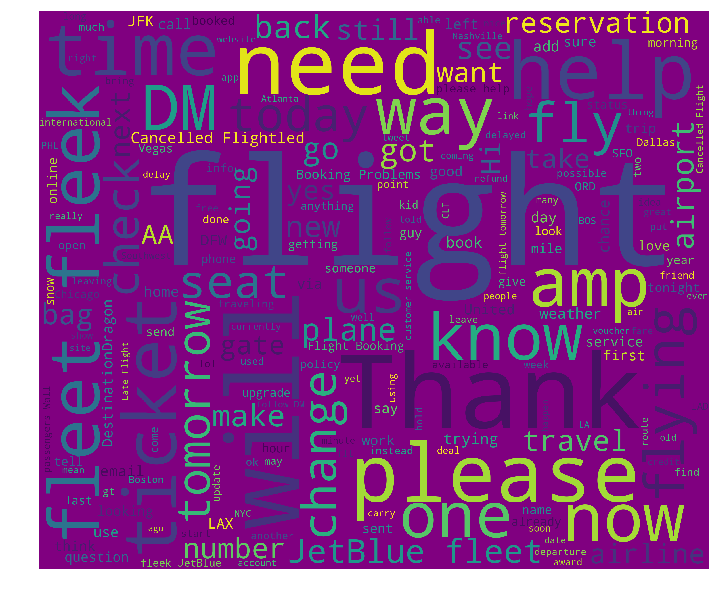

In [82]:
#visualization using wordcloud for the neutral tweets
df=tweet[tweet['airline_sentiment']=='neutral']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])


wordcloud = WordCloud(stopwords=STOPWORDS,background_color='purple',width=3000,height=2500).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()str.slice(0,3)


### Data Cleaning and Data Preprocessing

In [83]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [84]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [102]:
tweet['sentiment']=tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
tweet.sentiment.head()

0    1
1    1
2    1
3    0
4    0
Name: sentiment, dtype: int64

In [103]:
#Splitting the data into train and test
tweet['clean_tweet']=tweet['text'].apply(lambda x: tweet_to_words(x))
tweet['Tweet_length']=tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(tweet,test_size=0.2,random_state=42)

In [104]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

### Supervised Learing Algorithms

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [107]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [128]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy*100)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy*100)+'%') 

Accuracy of LogisticRegression is 64.51502732240438%
Accuracy of KNeighborsClassifier is 58.91393442622951%
Accuracy of SVC is 64.51502732240438%
Accuracy of DecisionTreeClassifier is 75.64890710382514%
Accuracy of RandomForestClassifier is 81.35245901639344%
Accuracy of AdaBoostClassifier is 78.55191256830601%
Accuracy of GaussianNB is 57.240437158469945%


Text(0.5,1,'Accuracies of Models')

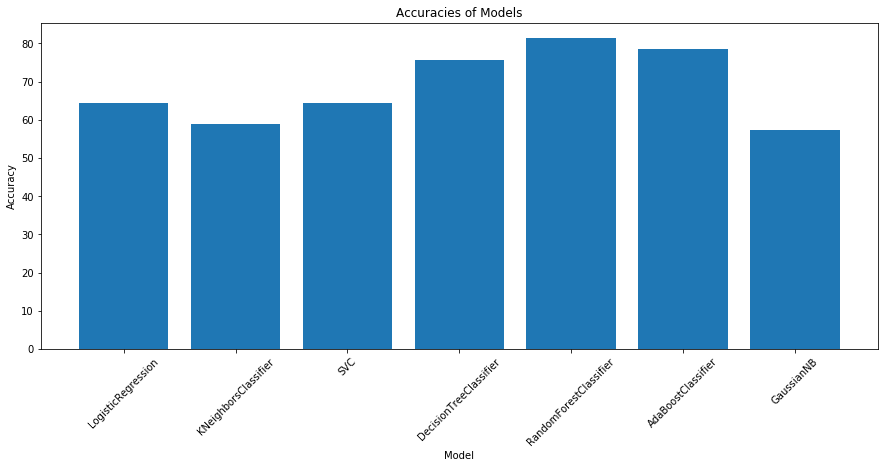

In [130]:
plt.rcParams["figure.figsize"] = [15, 6]
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

#### From the above graph we can see that Random Forest Classifier has maximum accuracy of 81.35%. In simple words, for any new input data, Random Forest Classifier will classify the sentiment of the data with high accuracy.

### Thank you for viewing this Notebook!